In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Problem Statement:Given a list of customer policy details with claim data, the problem is to identify potentially fraudulent vehicle insurance claims.

In [2]:
#configurations
file_path=r'C:\Users\Admin\fraud_vehicle_insurance_claims.xlsx'

In [3]:
df=pd.read_excel(file_path)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
#create a copy of data to work with
customer_data=df.copy()

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
#This is to seperate datetime columns from categorical
for col in df.columns:
    df = df.apply(lambda col: pd.to_datetime(col, errors='ignore') 
              if col.dtypes == object 
              else col, 
              axis=0)


In [8]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [12]:
date_Columns=df.select_dtypes(include=['datetime']).columns
date_Columns

Index(['policy_bind_date', 'incident_date'], dtype='object')

In [99]:
len(customer_data)

1000

In [7]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [8]:
customer_data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [9]:
print(customer_data.columns.size)
print(customer_data.columns)

39
Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


Analysing the categorical columns

In [13]:
customer_data.select_dtypes(include='object').columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [15]:
customer_data['policy_bind_date'].dtype

dtype('O')

In [16]:
import datetime

In [17]:
customer_data['policy_bind_date1']=pd.to_datetime(customer_data['policy_bind_date'])

In [18]:
customer_data['incident_date1']=pd.to_datetime(customer_data['incident_date'])

In [19]:
customer_data['incident_date1_dayofweek'] = customer_data['incident_date1'].dt.isocalendar().day
customer_data.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_date1,incident_date1,incident_date1_dayofweek
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,2014-10-17,2015-01-25,7
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,2006-06-27,2015-01-21,3
2,134,29,687698,2000-06-09 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,2000-06-09,2015-02-22,7
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990-05-25,2015-10-01,4
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,2014-06-06,2015-02-17,2


In [20]:
customer_data['incident_date1_dayofweek'].unique()

<IntegerArray>
[7, 3, 4, 2, 5, 1, 6]
Length: 7, dtype: UInt32

In [21]:
#Creating a numerical column for target
customer_data['target']=np.where(customer_data.fraud_reported=='Y',1,0)

In [22]:
customer_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_date1,incident_date1,incident_date1_dayofweek,target
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,2014-10-17,2015-01-25,7,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,2006-06-27,2015-01-21,3,1
2,134,29,687698,2000-06-09 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,2000-06-09,2015-02-22,7,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,1990-05-25,2015-10-01,4,1
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,2014-06-06,2015-02-17,2,0


In [23]:
customer_data.policy_state.unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [24]:
#insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship
print(customer_data.insured_sex.unique())
print(customer_data.insured_education_level.unique())
print(customer_data.insured_occupation.unique())
print(customer_data.insured_hobbies.unique())
print(customer_data.insured_relationship.unique())

['MALE' 'FEMALE']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']


In [25]:
#incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location
print(customer_data.incident_type.unique())
print(customer_data.collision_type.unique())
print(customer_data.incident_severity.unique())
print(customer_data.authorities_contacted.unique())
print(customer_data.incident_state.unique())
print(customer_data.incident_city.unique())
print(customer_data.incident_location.unique())

['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
['Side Collision' '?' 'Rear Collision' 'Front Collision']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
['Police' 'None' 'Fire' 'Other' 'Ambulance']
['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend'
 'Northbrook']
['9935 4th Drive' '6608 MLK Hwy' '7121 Francis Lane' '6956 Maple Drive'
 '3041 3rd Ave' '8973 Washington St' '5846 Weaver Drive' '3525 3rd Hwy'
 '4872 Rock Ridge' '3066 Francis Ave' '1558 1st Ridge' '5971 5th Hwy'
 '6655 5th Drive' '6582 Elm Lane' '6851 3rd Drive' '9573 Weaver Ave'
 '5074 3rd St' '4546 Tree St' '3842 Solo Ridge' '8101 3rd Ridge'
 '5380 Pine St' '8957 Weaver Drive' '2526 Embaracadero Ave'
 '5667 4th Drive' '2502 Apache Hwy' '3418 Texas Lane' '2533 Elm St'
 '3790 Andromedia Hwy' '3220 Rock Drive' '2100 Francis Drive'
 '4687 5th Drive' '9038 2nd Lane' '6092 5th Ave' '8353 Britain Ridge'
 '3540 Maple St'

<AxesSubplot:xlabel='collision_type'>

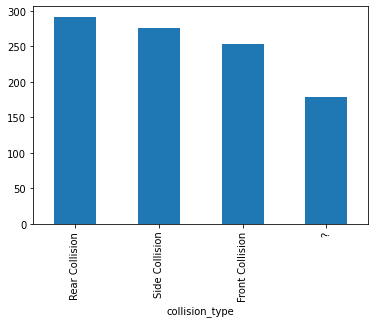

In [26]:
customer_data.groupby(['collision_type'])['collision_type'].count().sort_values(ascending=False).plot.bar()

In [27]:
customer_data['collision_type']=np.where(customer_data.collision_type=='?','Missing',customer_data['collision_type'])

<AxesSubplot:xlabel='collision_type'>

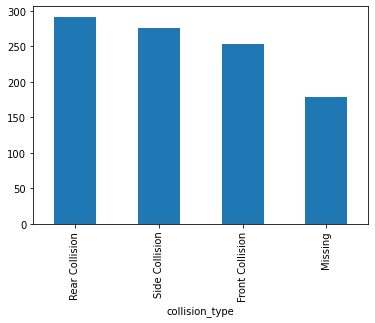

In [28]:
customer_data.groupby(['collision_type'])['collision_type'].count().sort_values(ascending=False).plot.bar()

In [29]:
customer_data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

<AxesSubplot:xlabel='property_damage'>

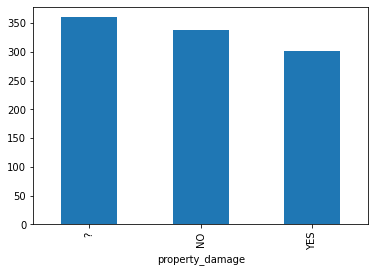

In [30]:
customer_data.groupby(['property_damage'])['property_damage'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='property_damage'>

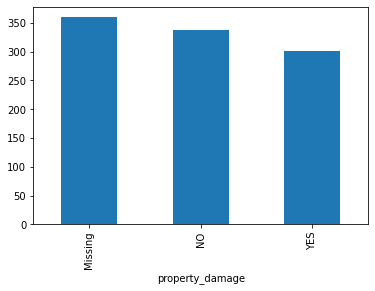

In [31]:
customer_data['property_damage']=np.where(customer_data.property_damage=='?','Missing',customer_data['property_damage'])
customer_data.groupby(['property_damage'])['property_damage'].count().sort_values(ascending=False).plot.bar()

In [32]:
customer_data['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='bodily_injuries'>

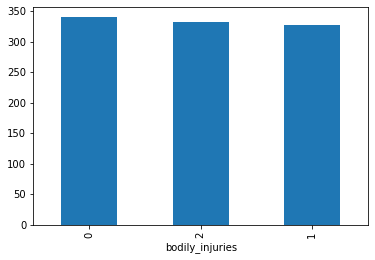

In [33]:
customer_data.groupby(['bodily_injuries'])['bodily_injuries'].count().sort_values(ascending=False).plot.bar()

In [34]:
customer_data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

<AxesSubplot:xlabel='police_report_available'>

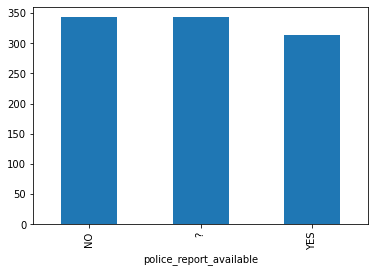

In [35]:
customer_data.groupby(['police_report_available'])['police_report_available'].count().sort_values(ascending=False).plot.bar()

In [36]:
customer_data['police_report_available']=np.where(customer_data.police_report_available=='?','Missing',customer_data['police_report_available'])

In [37]:
customer_data['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [38]:
customer_data['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', 95, 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', 93, 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [39]:
customer_data['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [40]:
customer_data['years_as_customer']=customer_data['months_as_customer']/12

In [41]:
customer_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_date1,incident_date1,incident_date1_dayofweek,target,years_as_customer
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,2014-10-17,2015-01-25,7,1,27.333333
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,2006-06-27,2015-01-21,3,1,19.000000
2,134,29,687698,2000-06-09 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,2000-06-09,2015-02-22,7,0,11.166667
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,1990-05-25,2015-10-01,4,1,21.333333
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,2014-06-06,2015-02-17,2,0,19.000000


In [42]:
customer_data['age'].max()

64

Visualizations:Comparing the independent variables with respect to target

Lets analyze the continuous variables first('age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'years_as_customer')

In [43]:
#Method to find the proportion of people with target 1 wrt input
def calc_perc(colname):
    df1=pd.DataFrame(customer_data.groupby([colname])['target'].count())
    df2=pd.DataFrame(customer_data.groupby([colname])['target'].sum())
    df3=pd.merge(df1,df2,on=colname)
    df3.rename(columns={'target_x':'target_total','target_y':'target_1'},inplace=True)
    df3['target_0']=df3['target_total']-df3['target_1']
    df3['perc_ppl_with_fraud_claim']=((df3['target_1']/df3['target_total'])*100)
    df3=df3.sort_values(by='perc_ppl_with_fraud_claim',ascending=False)
    return df3

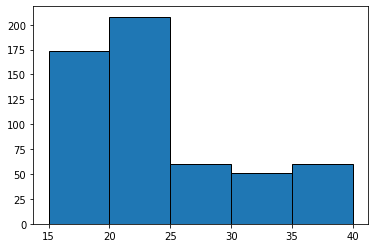

In [44]:
bins = [15,20,25,30,35,40]
plt.hist(customer_data.years_as_customer,bins, edgecolor = 'black')
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

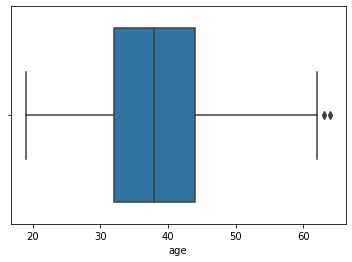

In [45]:
bins = [15,20,25,30,35,40,45,50,55,60,65]
sns.boxplot(customer_data.age)


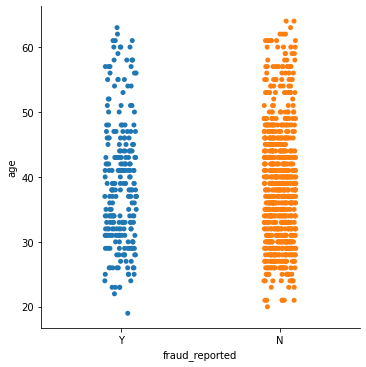

In [46]:
#comparing age wrt target
sns.catplot(x='fraud_reported',y='age',data=customer_data)

In [47]:
#Looking at the proportion of people under each age category
bins = [20,30,40,50,60]
customer_data['Age_disc']=pd.cut(customer_data['age'],bins=bins)
df_age=calc_perc('Age_disc')
df_age

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
Age_disc,,,,
"(50, 60]",96,30,66,31.250000
"(40, 50]",293,72,221,24.573379
"(30, 40]",396,94,302,23.737374
"(20, 30]",195,45,150,23.076923


In [48]:
#Looking at the proportion of people under each category
bins = [5,10,15,20,25,30,35,40]
customer_data['Years_as_customer_disc']=pd.cut(customer_data['years_as_customer'],bins=bins)

df_years_as_customer=calc_perc('Years_as_customer_disc')
df_years_as_customer

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
Years_as_customer_disc,,,,
"(30, 35]",49,16,33,32.653061
"(35, 40]",60,17,43,28.333333
"(25, 30]",61,17,44,27.868852
"(5, 10]",161,41,120,25.465839
"(10, 15]",188,46,142,24.468085
"(15, 20]",171,40,131,23.391813
"(20, 25]",208,45,163,21.634615


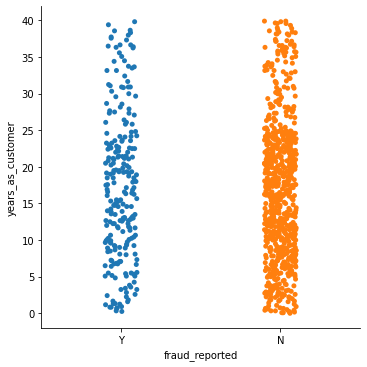

In [49]:
#comparing years as customer wrt target
sns.catplot(x='fraud_reported',y='years_as_customer',data=customer_data)

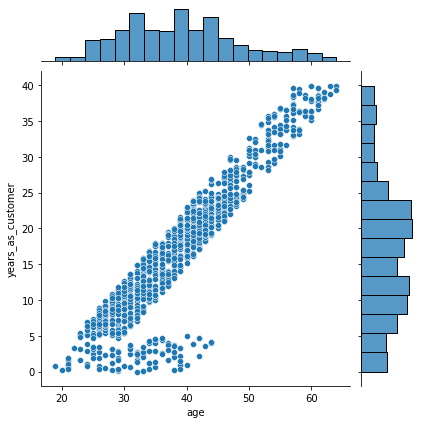

In [50]:
sns.jointplot(x='age',y='years_as_customer',data=customer_data)

Age and years as customer is highly positively co-related.No specific pattern observed for age and years as customer with respect to fraud reported.

In [51]:
#Get the list of numerical columns for analysis first
customer_data.select_dtypes(include='number').columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'incident_date1_dayofweek', 'target', 'years_as_customer'],
      dtype='object')

In [52]:
intervals=calc_range('policy_deductable')
customer_data['policy_deductable_disc'] = pd.cut(x = customer_data['policy_deductable'], bins=intervals, include_lowest=True)
df_deductable=calc_perc('policy_deductable_disc')
df_deductable

NameError: name 'calc_range' is not defined

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

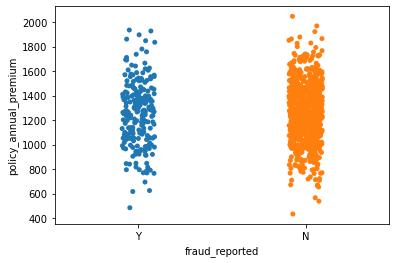

In [104]:
sns.stripplot(customer_data.fraud_reported,customer_data.policy_annual_premium)

No specific pattern observed in fraud reported 'Y' category with respect to policy_annual_premium.Lets check the same by calculating percentage.

In [53]:
def calc_range(colName):
    
    min_value=int(np.floor(customer_data[colName].min()))
    max_value=int(np.floor(customer_data[colName].max()))
    value_range = max_value - min_value

    # let's round the bin width
    inter_value = int(np.round(value_range/10))

    intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
    return intervals

In [54]:
intervals=calc_range('policy_annual_premium')
customer_data['Premium_disc'] = pd.cut(x = customer_data['policy_annual_premium'], bins=intervals, include_lowest=True)
df_premium=calc_perc('Premium_disc')
df_premium

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
Premium_disc,,,,
"(1882.0, 2043.0]",5,3,2,60.000000
"(1238.0, 1399.0]",264,78,186,29.545455
"(916.0, 1077.0]",155,44,111,28.387097
"(755.0, 916.0]",61,16,45,26.229508
"(432.999, 594.0]",4,1,3,25.000000
"(594.0, 755.0]",13,3,10,23.076923
"(1560.0, 1721.0]",70,16,54,22.857143
"(1721.0, 1882.0]",27,6,21,22.222222
"(1399.0, 1560.0]",169,35,134,20.710059


policy_annual_premium looks like having impact on target.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='umbrella_limit_disc', ylabel='count'>

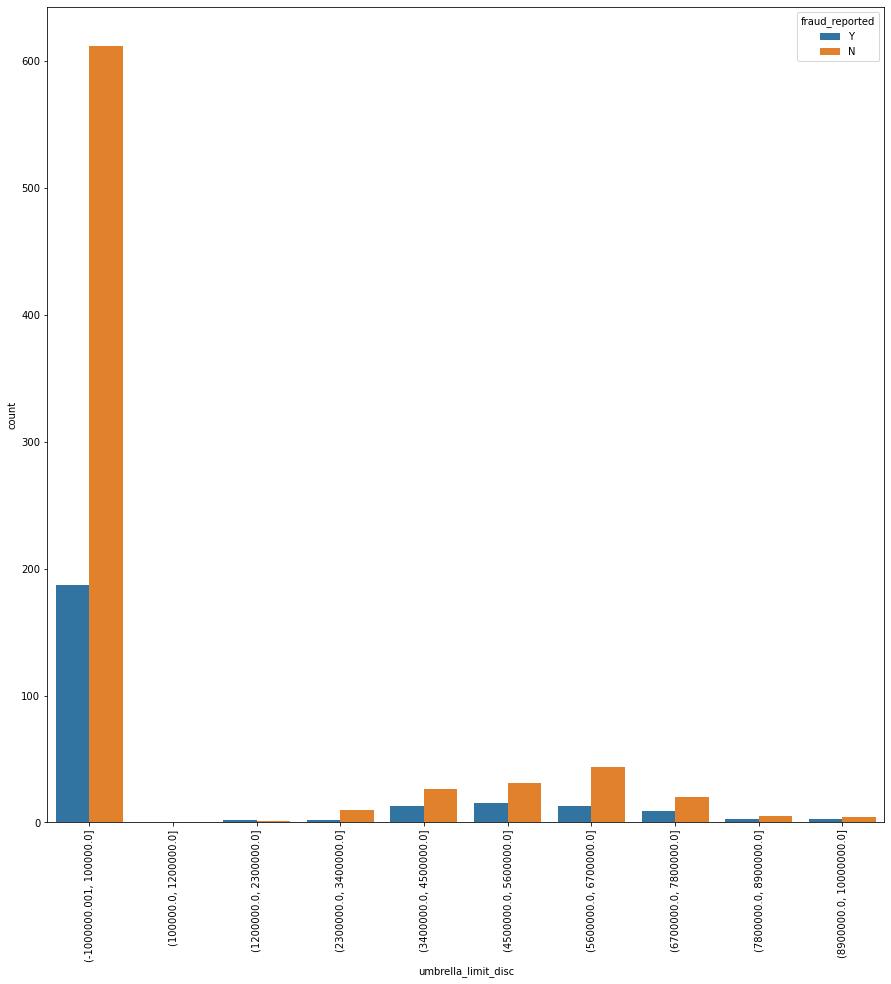

In [65]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(customer_data.umbrella_limit_disc,hue=customer_data.fraud_reported)

In [61]:
intervals=calc_range('umbrella_limit')
customer_data['umbrella_limit_disc'] = pd.cut(x = customer_data['umbrella_limit'], bins=intervals, include_lowest=True)
df_umbLimit=calc_perc('umbrella_limit_disc')
df_umbLimit

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
umbrella_limit_disc,,,,
"(1200000.0, 2300000.0]",3,2,1,66.666667
"(8900000.0, 10000000.0]",7,3,4,42.857143
"(7800000.0, 8900000.0]",8,3,5,37.500000
"(3400000.0, 4500000.0]",39,13,26,33.333333
"(4500000.0, 5600000.0]",46,15,31,32.608696
"(6700000.0, 7800000.0]",29,9,20,31.034483
"(-1000000.001, 100000.0]",799,187,612,23.404255
"(5600000.0, 6700000.0]",57,13,44,22.807018
"(2300000.0, 3400000.0]",12,2,10,16.666667


umbrella_limit looks like having impact on target.

In [66]:
#customer_data.insured_zip.value_counts()
customer_data['insured_zip_new']=customer_data['insured_zip'].astype('str').str[:2]


In [67]:
customer_data['insured_zip_new'].value_counts()

46    155
47    150
60    143
61    139
44    138
43    132
45    131
62     12
Name: insured_zip_new, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_zip_new', ylabel='count'>

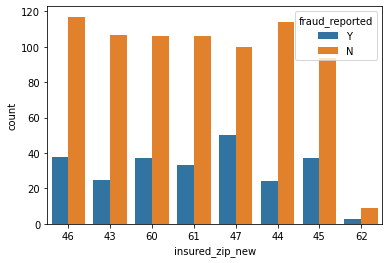

In [68]:
sns.countplot(customer_data.insured_zip_new,hue=customer_data.fraud_reported)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

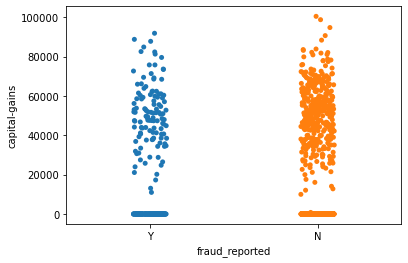

In [53]:
sns.stripplot(customer_data.fraud_reported,customer_data['capital-gains'])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

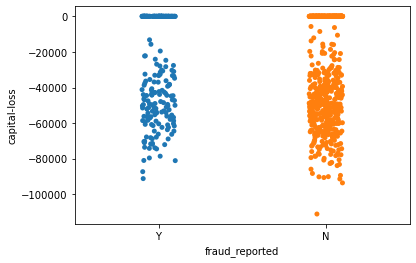

In [54]:
sns.stripplot(customer_data.fraud_reported,customer_data['capital-loss'])

In [166]:
intervals=calc_range('capital-gains')
customer_data['capital-gains_disc'] = pd.cut(x = customer_data['capital-gains'], bins=intervals, include_lowest=True)
df_capitalGains=calc_perc('capital-gains_disc')
df_capitalGains

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
capital-gains_disc,,,,
"(80400.0, 90450.0]",15,6,9,40.000000
"(10050.0, 20100.0]",9,3,6,33.333333
"(40200.0, 50250.0]",107,30,77,28.037383
"(-0.001, 10050.0]",510,129,381,25.294118
"(20100.0, 30150.0]",36,9,27,25.000000
"(50250.0, 60300.0]",127,29,98,22.834646
"(70350.0, 80400.0]",32,7,25,21.875000
"(30150.0, 40200.0]",79,17,62,21.518987
"(60300.0, 70350.0]",80,16,64,20.000000


In [167]:

intervals=calc_range('capital-loss')
customer_data['capital-loss_disc'] = pd.cut(x = customer_data['capital-loss'], bins=intervals, include_lowest=True)
df_capitalLoss=calc_perc('capital-loss_disc')
df_capitalLoss

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
capital-loss_disc,,,,
"(-33330.0, -22220.0]",59,18,41,30.508475
"(-44440.0, -33330.0]",99,29,70,29.292929
"(-77770.0, -66660.0]",60,16,44,26.666667
"(-66660.0, -55550.0]",111,28,83,25.225225
"(-88880.0, -77770.0]",20,5,15,25.000000
"(-11110.0, 0.0]",479,112,367,23.382046
"(-55550.0, -44440.0]",146,34,112,23.287671
"(-22220.0, -11110.0]",18,4,14,22.222222
"(-99990.0, -88880.0]",7,1,6,14.285714


No specific relationship observed in capital-loss with respect to fraud_reported.capital-gains looks like having a impact.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

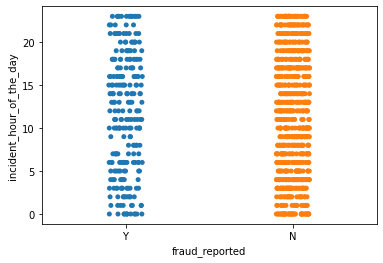

In [57]:
sns.stripplot(customer_data.fraud_reported,customer_data['incident_hour_of_the_day'])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='bodily_injuries'>

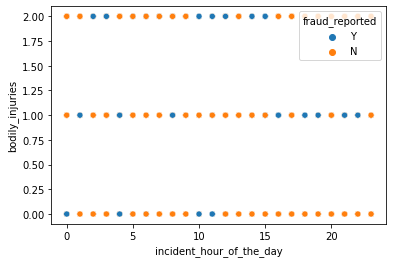

In [58]:
sns.scatterplot(x='incident_hour_of_the_day',y='bodily_injuries',data=customer_data,hue='fraud_reported')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='witnesses'>

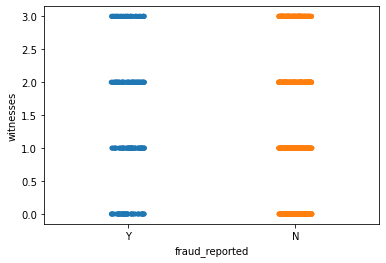

In [59]:
sns.stripplot(customer_data.fraud_reported,customer_data.witnesses)

In [60]:
df_witnesses=calc_perc('witnesses')
df_witnesses

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
witnesses,,,,
0,249,50,199,20.080321
1,258,63,195,24.418605
2,250,74,176,29.600000
3,243,60,183,24.691358


In [168]:
df_incident_hour_of_the_day=calc_perc('incident_hour_of_the_day')
df_incident_hour_of_the_day

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
incident_hour_of_the_day,,,,
11,30,12,18,40.000000
14,43,15,28,34.883721
18,41,14,27,34.146341
15,39,13,26,33.333333
16,49,16,33,32.653061
10,46,15,31,32.608696
2,31,10,21,32.258065
6,44,14,30,31.818182
1,29,8,21,27.586207


In [61]:
df_bodily_injuries=calc_perc('bodily_injuries')
df_bodily_injuries

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
bodily_injuries,,,,
0,340,80,260,23.529412
1,328,77,251,23.475610
2,332,90,242,27.108434


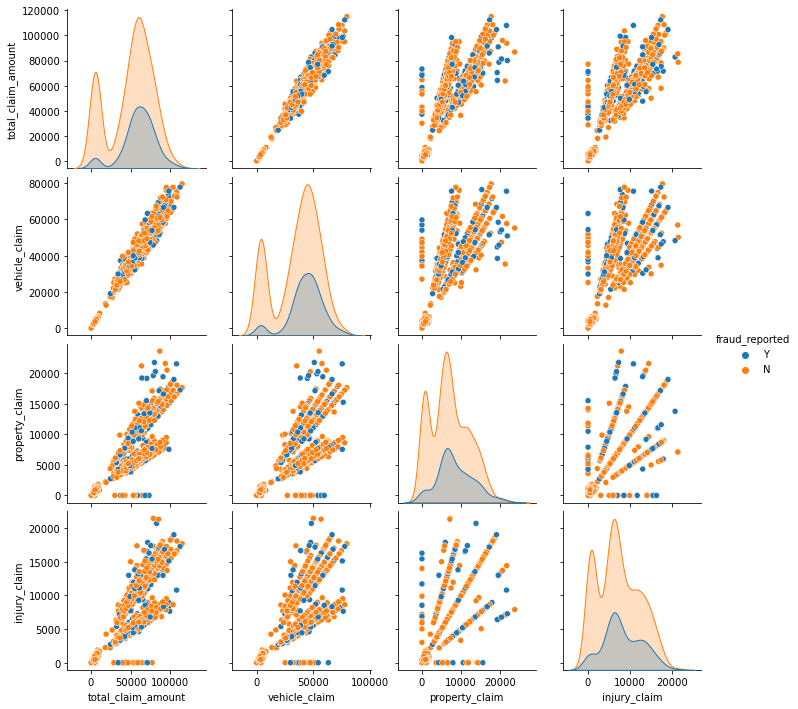

In [62]:
sns.pairplot(customer_data,vars=['total_claim_amount','vehicle_claim','property_claim','injury_claim'],hue='fraud_reported')

In [63]:
intervals=calc_range('total_claim_amount')
customer_data['total_claim_amount_disc'] = pd.cut(x = customer_data['total_claim_amount'], bins=intervals, include_lowest=True)
df_totalclaim=calc_perc('total_claim_amount_disc')
df_totalclaim

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
total_claim_amount_disc,,,,
"(99.999, 11582.0]",178,16,162,8.988764
"(11582.0, 23064.0]",2,0,2,0.000000
"(23064.0, 34546.0]",27,4,23,14.814815
"(34546.0, 46028.0]",87,21,66,24.137931
"(46028.0, 57510.0]",194,57,137,29.381443
"(57510.0, 68992.0]",229,63,166,27.510917
"(68992.0, 80474.0]",173,53,120,30.635838
"(80474.0, 91956.0]",78,23,55,29.487179
"(91956.0, 103438.0]",23,7,16,30.434783


We can see that as the total claim amount increases,percentage of fraud reported also increases slightly.

In [74]:
intervals=calc_range('vehicle_claim')
customer_data['vehicle_claim_disc'] = pd.cut(x = customer_data['vehicle_claim'], bins=intervals, include_lowest=True)
df_vehicleclaim=calc_perc('vehicle_claim_disc')
df_vehicleclaim

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
vehicle_claim_disc,,,,
"(63662.0, 71611.0]",28,10,18,35.714286
"(71611.0, 79560.0]",15,5,10,33.333333
"(31866.0, 39815.0]",170,54,116,31.764706
"(47764.0, 55713.0]",188,58,130,30.851064
"(39815.0, 47764.0]",233,63,170,27.038627
"(55713.0, 63662.0]",99,25,74,25.252525
"(23917.0, 31866.0]",70,13,57,18.571429
"(15968.0, 23917.0]",17,3,14,17.647059
"(69.999, 8019.0]",177,16,161,9.039548


In [65]:
intervals=calc_range('property_claim')
customer_data['property_claim_disc'] = pd.cut(x = customer_data['property_claim'], bins=intervals, include_lowest=True)
df_propertyclaim=calc_perc('property_claim_disc')
df_propertyclaim

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
property_claim_disc,,,,
"(-0.001, 2367.0]",196,22,174,11.224490
"(2367.0, 4734.0]",72,16,56,22.222222
"(4734.0, 7101.0]",276,76,200,27.536232
"(7101.0, 9468.0]",135,39,96,28.888889
"(9468.0, 11835.0]",126,37,89,29.365079
"(11835.0, 14202.0]",98,26,72,26.530612
"(14202.0, 16569.0]",67,18,49,26.865672
"(16569.0, 18936.0]",16,4,12,25.000000
"(18936.0, 21303.0]",10,7,3,70.000000


In [66]:
intervals=calc_range('injury_claim')
customer_data['injury_claim_disc'] = pd.cut(x = customer_data['injury_claim'], bins=intervals, include_lowest=True)
df_injuryclaim=calc_perc('injury_claim_disc')
df_injuryclaim

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
injury_claim_disc,,,,
"(-0.001, 2145.0]",200,25,175,12.500000
"(2145.0, 4290.0]",50,13,37,26.000000
"(4290.0, 6435.0]",210,60,150,28.571429
"(6435.0, 8580.0]",172,50,122,29.069767
"(8580.0, 10725.0]",92,22,70,23.913043
"(10725.0, 12870.0]",107,28,79,26.168224
"(12870.0, 15015.0]",93,29,64,31.182796
"(15015.0, 17160.0]",55,14,41,25.454545
"(17160.0, 19305.0]",18,5,13,27.777778


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='auto_year'>

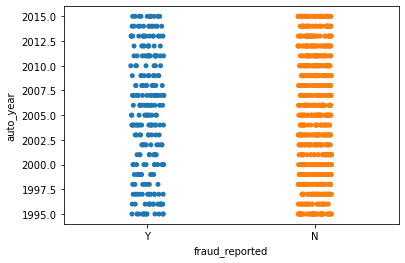

In [67]:
sns.stripplot(customer_data.fraud_reported,customer_data.auto_year)

In [68]:
intervals=calc_range('auto_year')
customer_data['auto_year_disc'] = pd.cut(x = customer_data['auto_year'], bins=intervals, include_lowest=True)
df_auto_year=calc_perc('auto_year_disc')
df_auto_year

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
auto_year_disc,,,,
"(1994.999, 1997.0]",139,39,100,28.057554
"(1997.0, 1999.0]",95,17,78,17.894737
"(1999.0, 2001.0]",84,20,64,23.809524
"(2001.0, 2003.0]",100,19,81,19.000000
"(2003.0, 2005.0]",93,28,65,30.107527
"(2005.0, 2007.0]",105,32,73,30.476190
"(2007.0, 2009.0]",95,21,74,22.105263
"(2009.0, 2011.0]",103,24,79,23.300971
"(2011.0, 2013.0]",95,24,71,25.263158


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='incident_date1_dayofweek'>

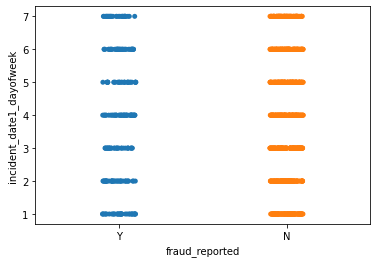

In [69]:
sns.stripplot(customer_data.fraud_reported,customer_data.incident_date1_dayofweek)

In [70]:
df_incident_date=calc_perc('incident_date1_dayofweek')
df_incident_date

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
incident_date1_dayofweek,,,,
1,137,34,103,24.817518
2,151,38,113,25.165563
3,156,31,125,19.871795
4,144,43,101,29.861111
5,129,29,100,22.480620
6,164,42,122,25.609756
7,119,30,89,25.210084


Now, lets get into the visualization of categorical values

In [137]:
customer_data.select_dtypes(exclude=["number"]).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported', 'policy_bind_date1', 'incident_date1', 'Age_disc',
       'Years_as_customer_disc', 'Premium_disc', 'umbrella_limit_disc',
       'capital-gains_disc', 'capital-loss_disc', 'total_claim_amount_disc',
       'vehicle_claim_disc', 'property_claim_disc', 'injury_claim_disc',
       'auto_year_disc', 'policy_deductable_disc', 'insured_zip_new'],
      dtype='object')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_zip_new', ylabel='count'>

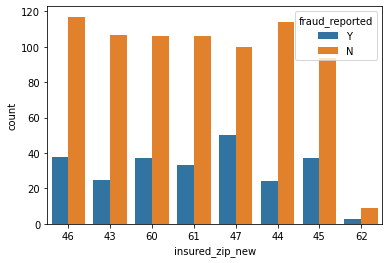

In [138]:
sns.countplot(customer_data.insured_zip_new,hue=customer_data.fraud_reported)

In [145]:
df_insured_zip=calc_perc('insured_zip_new')
df_insured_zip

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
insured_zip_new,,,,
43,132,25,107,18.939394
44,138,24,114,17.391304
45,131,37,94,28.244275
46,155,38,117,24.516129
47,150,50,100,33.333333
60,143,37,106,25.874126
61,139,33,106,23.741007
62,12,3,9,25.000000


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

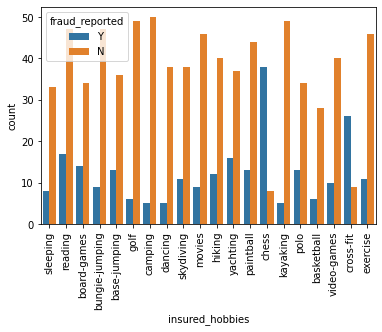

In [140]:
plt.xticks(rotation=90)
sns.countplot(customer_data.insured_hobbies,hue=customer_data.fraud_reported)

In [146]:
df_insured_hobbies=calc_perc('insured_hobbies')
df_insured_hobbies

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
insured_hobbies,,,,
base-jumping,49,13,36,26.530612
basketball,34,6,28,17.647059
board-games,48,14,34,29.166667
bungie-jumping,56,9,47,16.071429
camping,55,5,50,9.090909
chess,46,38,8,82.608696
cross-fit,35,26,9,74.285714
dancing,43,5,38,11.627907
exercise,57,11,46,19.298246


hobbies chess and cross fit has larger number of fraud claims compared to non-fraud claims

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_state', ylabel='count'>

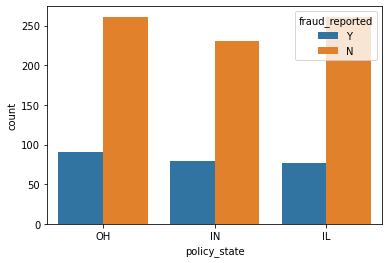

In [72]:
sns.countplot(customer_data.policy_state,hue=customer_data.fraud_reported)

In [73]:
df_policy_state=calc_perc('policy_state')
df_policy_state

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
policy_state,,,,
IL,338,77,261,22.781065
IN,310,79,231,25.483871
OH,352,91,261,25.852273


We could see that the numbers and distribution are same across all the states.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

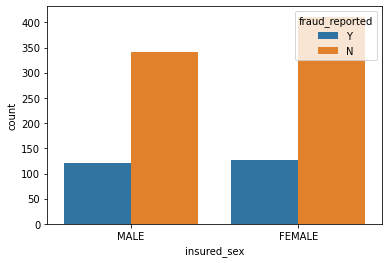

In [74]:
sns.countplot(customer_data.insured_sex,hue=customer_data.fraud_reported)

In [75]:
df_insured_sex=calc_perc('insured_sex')
df_insured_sex

,target_total,target_1,target_0,perc_ppl_with_fraud_claim
insured_sex,,,,
FEMALE,537,126,411,23.463687
MALE,463,121,342,26.133909


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,target_total,target_1,target_0,perc_ppl_with_fraud_claim
insured_education_level,,,,
Associate,145,34,111,23.448276
College,122,32,90,26.229508
High School,160,36,124,22.500000
JD,161,42,119,26.086957
MD,144,38,106,26.388889
Masters,143,32,111,22.377622
PhD,125,33,92,26.400000


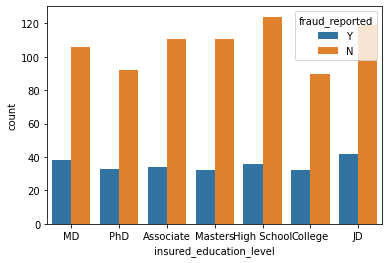

In [76]:
sns.countplot(customer_data.insured_education_level,hue=customer_data.fraud_reported)
df_insured_education_level=calc_perc('insured_education_level')
df_insured_education_level

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

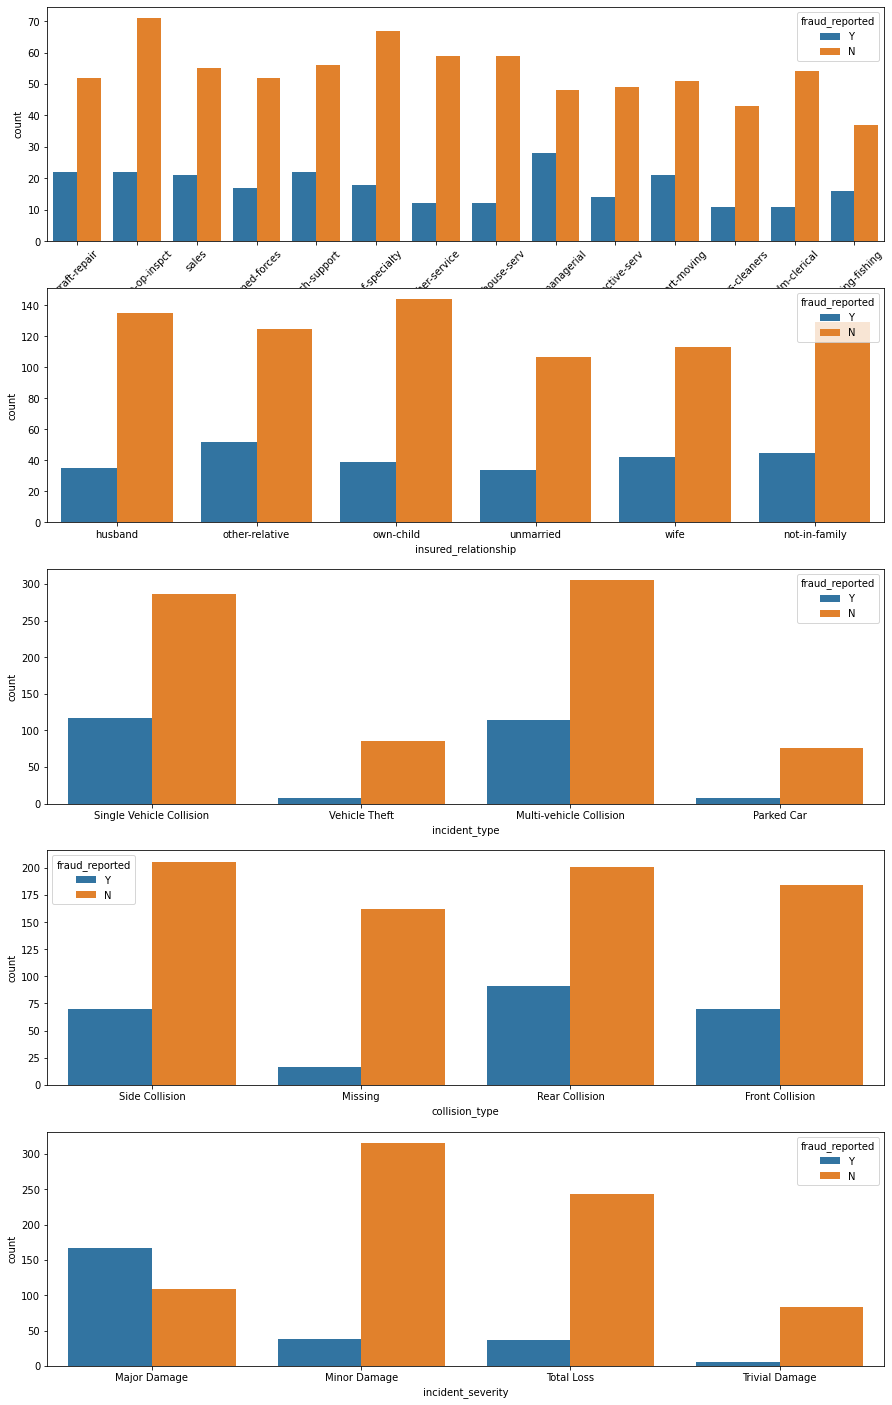

In [148]:
plt.subplots(5,1 ,figsize = (15,25))
plt.subplot(511)
sns.countplot(customer_data.insured_occupation,hue=customer_data.fraud_reported)
plt.xticks(rotation=45)
plt.subplot(512)
sns.countplot(customer_data.insured_relationship,hue=customer_data.fraud_reported)
plt.subplot(513)
sns.countplot(customer_data.incident_type,hue=customer_data.fraud_reported)
plt.subplot(514)
sns.countplot(customer_data.collision_type,hue=customer_data.fraud_reported)
plt.subplot(515)
sns.countplot(customer_data.incident_severity,hue=customer_data.fraud_reported)


In [160]:
df_insured_occupation=calc_perc('insured_occupation')
print(df_insured_occupation)
df_insured_relationship=calc_perc('insured_relationship')
print(df_insured_relationship)
df_incident_type=calc_perc('incident_type')
print(df_incident_type)
df_incident_severity=calc_perc('incident_severity')
print(df_incident_severity)
df_collision_type=calc_perc('collision_type')
print(df_collision_type)



                    target_total  target_1  target_0  \
insured_occupation                                     
exec-managerial               76        28        48   
farming-fishing               53        16        37   
craft-repair                  74        22        52   
transport-moving              72        21        51   
tech-support                  78        22        56   
sales                         76        21        55   
armed-forces                  69        17        52   
machine-op-inspct             93        22        71   
protective-serv               63        14        49   
prof-specialty                85        18        67   
handlers-cleaners             54        11        43   
adm-clerical                  65        11        54   
other-service                 71        12        59   
priv-house-serv               71        12        59   

                    perc_ppl_with_fraud_claim  
insured_occupation                             
exec-ma

'insured_relationship' has almost same distribution across all categories.'insured_occupation',collision type, incident severity and incident type looks like having impact on fraud_reported.In case of 'major damage' category in 'incident_severity' number of fraud cases is higher than the non-fraud ones.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_city', ylabel='count'>

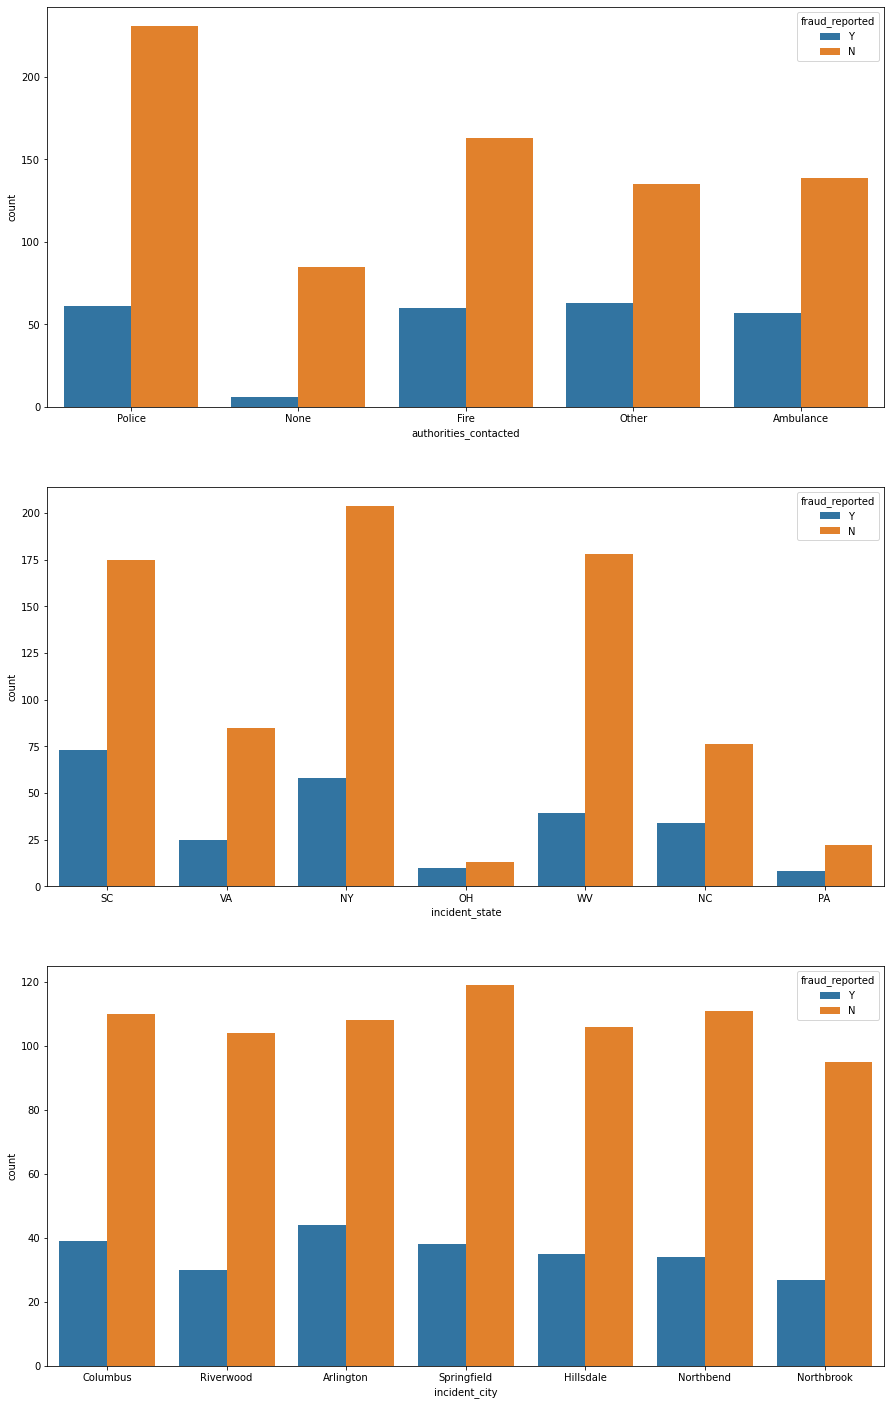

In [79]:
plt.subplots(3,1 ,figsize = (15,25))
plt.subplot(311)
sns.countplot(customer_data.authorities_contacted,hue=customer_data.fraud_reported)
plt.subplot(312)
sns.countplot(customer_data.incident_state,hue=customer_data.fraud_reported)
plt.subplot(313)
sns.countplot(customer_data.incident_city,hue=customer_data.fraud_reported)


In [161]:
df_authorities_contacted=calc_perc('authorities_contacted')
df_incident_state=calc_perc('incident_state')
df_incident_city=calc_perc('incident_city')
df_authorities_contacted,df_incident_state,df_incident_city

(                       target_total  target_1  target_0  \
 authorities_contacted                                     
 Other                           198        63       135   
 Ambulance                       196        57       139   
 Fire                            223        60       163   
 Police                          292        61       231   
 None                             91         6        85   
 
                        perc_ppl_with_fraud_claim  
 authorities_contacted                             
 Other                                  31.818182  
 Ambulance                              29.081633  
 Fire                                   26.905830  
 Police                                 20.890411  
 None                                    6.593407  ,
                 target_total  target_1  target_0  perc_ppl_with_fraud_claim
 incident_state                                                             
 OH                        23        10        13          

'authorities_contacted','incident_state' looks like having impact on the fraud_reported.'OH' state has almost same number of fraud and non-fraud claims reported.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

<AxesSubplot:xlabel='auto_model', ylabel='count'>

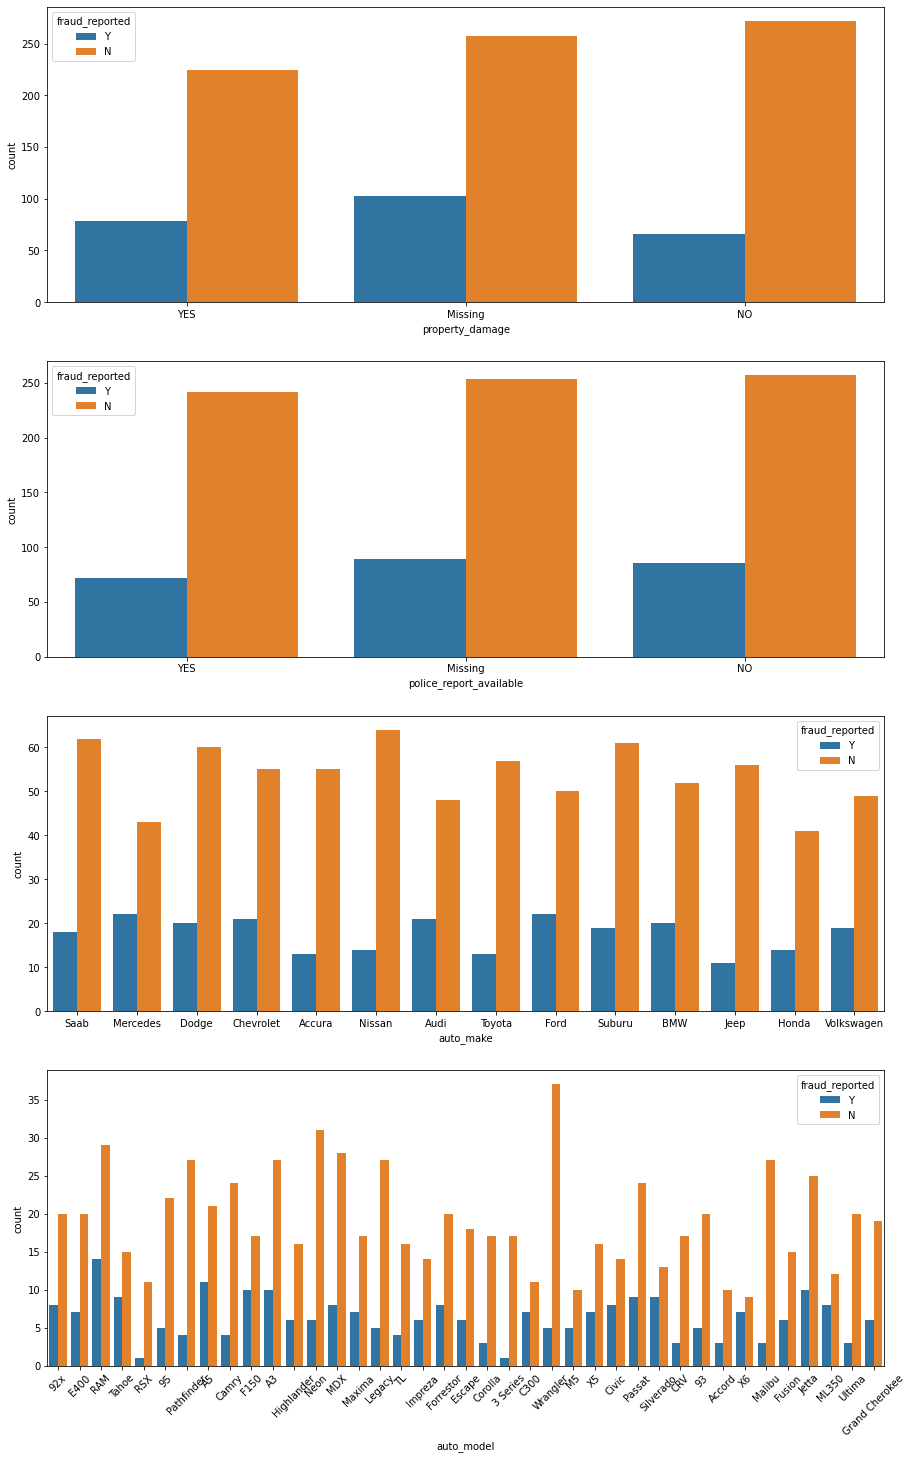

In [73]:
#'property_damage', 'police_report_available', 'auto_make', 'auto_model',

plt.subplots(4,1 ,figsize = (15,25))
plt.subplot(411)
sns.countplot(customer_data.property_damage,hue=customer_data.fraud_reported)
plt.subplot(412)
sns.countplot(customer_data.police_report_available,hue=customer_data.fraud_reported)
plt.subplot(413)
sns.countplot(customer_data.auto_make,hue=customer_data.fraud_reported)
plt.subplot(414)
plt.xticks(rotation=45)
sns.countplot(customer_data.auto_model,hue=customer_data.fraud_reported)


In [162]:
df_property_damage=calc_perc('property_damage')
df_police_report_available=calc_perc('police_report_available')
df_auto_make=calc_perc('auto_make')
df_auto_model=calc_perc('auto_model')
df_property_damage,df_police_report_available,df_auto_make,df_auto_model

(                 target_total  target_1  target_0  perc_ppl_with_fraud_claim
 property_damage                                                             
 Missing                   360       103       257                  28.611111
 YES                       302        78       224                  25.827815
 NO                        338        66       272                  19.526627,
                          target_total  target_1  target_0  \
 police_report_available                                     
 Missing                           343        89       254   
 NO                                343        86       257   
 YES                               314        72       242   
 
                          perc_ppl_with_fraud_claim  
 police_report_available                             
 Missing                                  25.947522  
 NO                                       25.072886  
 YES                                      22.929936  ,
             target_total 

RSX and 3-series auto_model categories have very less percentage of fraud claims compared to other models..

In [85]:
customer_data.auto_model.unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', 95, 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', 93, 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

<AxesSubplot:>

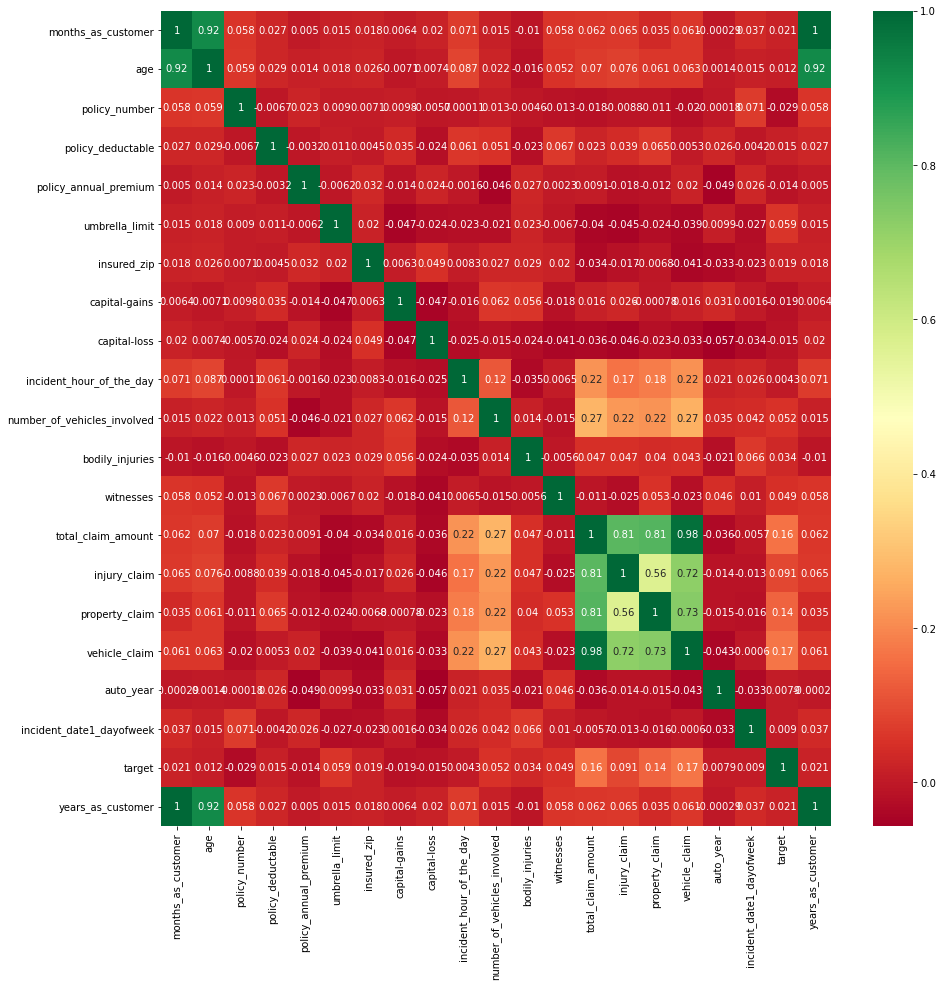

In [171]:
corr=customer_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

vehicle_claim,insured_zip_new,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,auto_model are th features idenified as having impact on target.

In [172]:
#Write the final output to an excel file
writer = pd.ExcelWriter(r'C:\Users\ADMIN\Desktop\UseCase2_EDAOutput.xlsx')
customer_data.to_excel(writer,index = False, header=True)
writer.save()